###*Sayantan Mukherjee 60009220131 CSE(DS)D2-2*

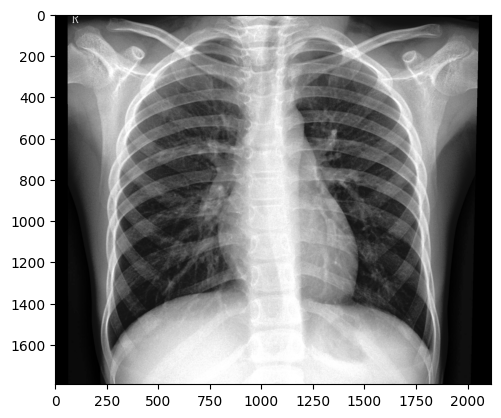

In [ ]:
import matplotlib.pyplot as plt
img=cv2.imread('/content/0120.jpeg',cv2.IMREAD_GRAYSCALE)
plt.imshow(img, cmap='gray')
plt.show()

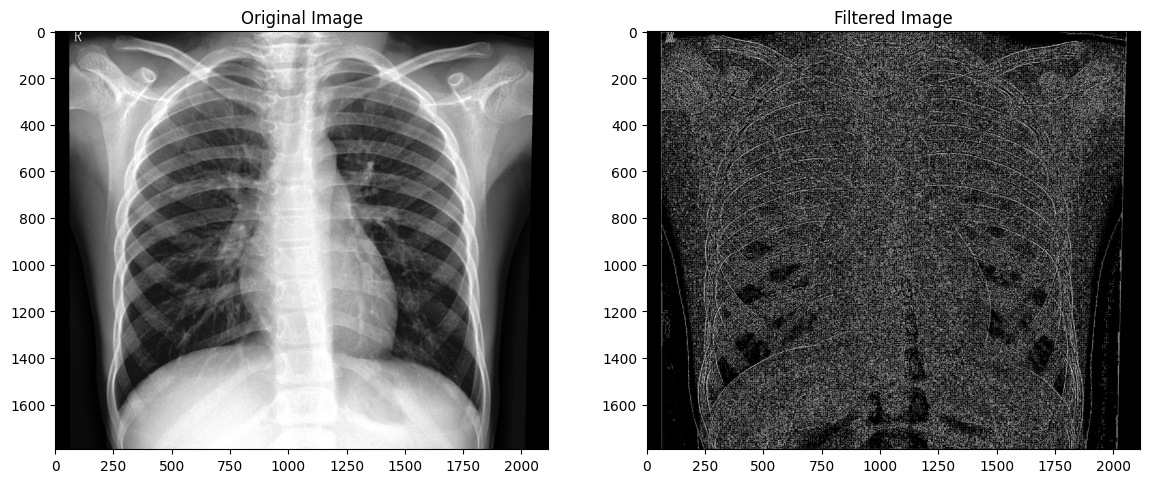

In [ ]:
import cv2
import numpy as np

img=cv2.imread('/content/0120.jpeg',cv2.IMREAD_GRAYSCALE)
kernel=np.array([[-1/9,-1/9,-1/9],[-1/9,8/9,-1/9],[-1/9,-1/9,-1/9]])
def high_pass_filter(image, kernel):
    image_height, image_width = image.shape
    kernel_height, kernel_width = kernel.shape

    pad_height = kernel_height // 2
    pad_width = kernel_width // 2

    padded_image = np.pad(image, ((pad_height, pad_height), (pad_width, pad_width)), mode='constant')

    filtered_image = np.zeros_like(image)

    for i in range(image_height):
        for j in range(image_width):
            # Extract the region of interest
            region = padded_image[i:i+kernel_height, j:j+kernel_width]
            # Apply the kernel (element-wise multiplication and sum)
            filtered_image[i, j] = np.sum(region * kernel)

    return filtered_image

filtered_img = high_pass_filter(img, kernel)
plt.figure(figsize=(14, 10))
plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(img, cmap='gray')
plt.subplot(1, 2, 2)
plt.title('Filtered Image')
plt.imshow(filtered_img, cmap='gray')
plt.show()


In [ ]:
!pip install opencv-python

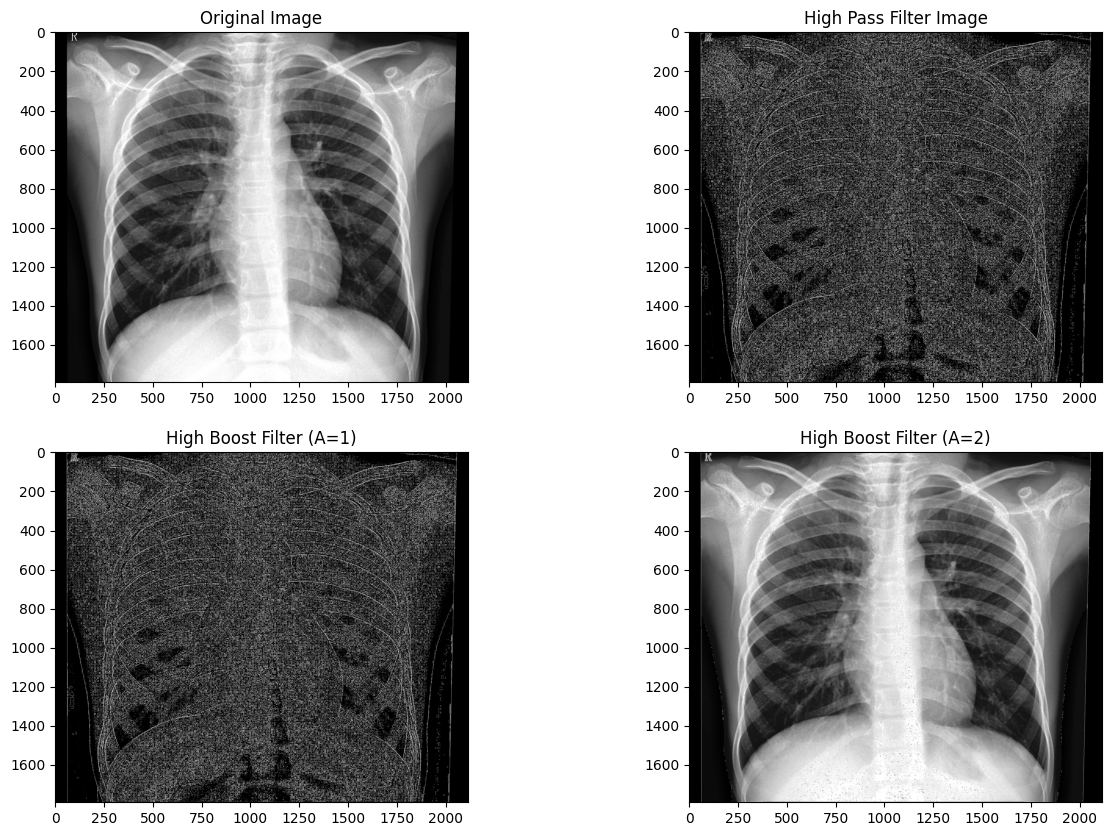

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def low_pass_filter(image):
    kernel = np.ones((3, 3)) / 9
    filtered_image = np.zeros_like(image)
    for i in range(1, image.shape[0] - 1):
        for j in range(1, image.shape[1] - 1):
            filtered_image[i, j] = np.sum(image[i-1:i+2, j-1:j+2] * kernel)
    return filtered_image

def high_boost_filter(image, A=1):
    high_pass_img = high_pass_filter(image,kernel)
    boosted_image = (A - 1) * image + high_pass_img
    return np.clip(boosted_image, 0, 255).astype(np.uint8)




high_pass_img = high_pass_filter(img,kernel)

high_boost_A1_img = high_boost_filter(img, A=1)
high_boost_A1_5_img = high_boost_filter(img, A=2)
high_boost_A1_3_img = high_boost_filter(img, A=1.3)

plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
plt.title('Original Image')
plt.imshow(img, cmap='gray')

plt.subplot(2, 2, 2)
plt.title('High Pass Filter Image')
plt.imshow(high_pass_img, cmap='gray')

plt.subplot(2, 2, 3)
plt.title('High Boost Filter (A=1)')
plt.imshow(high_boost_A1_img, cmap='gray')

plt.subplot(2, 2, 4)
plt.title('High Boost Filter (A=2)')
plt.imshow(high_boost_A1_5_img, cmap='gray')

plt.show()

#*Conclusion:*


##*High-Pass Filter:*

The application of the basic high-pass filter sharpened the edges by emphasizing high-frequency components, which correspond to the finer details in the image. This process removed much of the blurring and improved the visibility of critical structures such as lung textures and potential COVID-19 indicators (i.e., ground-glass opacities).

 Result: The edges in the image are enhanced, but low-frequency details (like the overall shape and soft gradients) are reduced, leaving an image that is sharper but also potentially noisier. This could be beneficial for highlighting boundaries but may obscure subtle clinical details.

##*High-Boost Filter:*

The high-boost filter works as a combination of the original image and its high-pass filtered version. This method not only sharpens the edges but also retains the low-frequency information (general contrast and smooth regions), providing a more balanced enhancement. It boosted the contrast of key areas while preserving broader features, making subtle changes in the lungs more apparent.

Result: The image becomes clearer with sharper edges, but without sacrificing the broader structures that might be diagnostically relevant. The high-boost filter offers a more "natural" look compared to the high-pass filter, which might be more practical for medical analysis.

#*Final Observation*

*In conclusion, both filters serve specific purposes in enhancing low-contrast images. The high-pass filter is a better choice for situations where edge details are of primary concern, while the high-boost filter offers a more comprehensive enhancement for medical images, where a combination of edge and contrast enhancement is essential. Given the context of COVID-19 image analysis, high-boost filtering may provide a more diagnostically valuable enhancement, offering a clearer view of potential lung abnormalities without overly distorting the image.*
